# **Статистический анализ данных**

**Цель исследования:** Проанализировать данные и проверить некоторые гипотезы, которые могут помочь сервису аренды самокатов GoFast вырасти.

**Дано:** Данные о некоторых пользователях из нескольких городов, а также об их поездках.

**Описание параметров данных:** Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

1) без подписки
- абонентская плата отсутствует;
- стоимость одной минуты поездки — 8 рублей;
- стоимость старта (начала поездки) — 50 рублей;

2) с подпиской Ultra
- абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 6 рублей;
- стоимость старта — бесплатно.



In [1]:
# загружаем необходимые библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
import scipy.stats as st

In [2]:
# Указываем базовые настройки 
sns.set()

In [3]:
# Указываем путь к файлу
try:
    data_users_row = pd.read_csv('/datasets/users_go.csv')
    data_rides_row = pd.read_csv('/datasets/rides_go.csv')
    data_subscription_row = pd.read_csv('/datasets/subscriptions_go.csv')
except: 
    data_users_row = pd.read_csv('C:/Users/Boris/datasets/users_go.csv')
    data_rides_row = pd.read_csv('C:/Users/Boris/datasets/rides_go.csv')
    data_subscription_row = pd.read_csv('C:/Users/Boris/datasets/subscriptions_go.csv')

In [4]:
# Смотрим общую информацию о наборах данных
data_users_row.info()
data_rides_row.info()
data_subscription_row.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Col

In [5]:
# Выводим первые строки наборов данных users
data_users_row.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [6]:
# Выводим первые строки наборов данных riders
data_rides_row.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [7]:
# Выводим первые строки наборов данных subscripes
data_subscription_row

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Из наборов данных видно, что всего есть 1565 пользователей (набор данных **users**), которые за время наблюдения совершили 18068 поездок (набор данных **rides**). В наборе данных **subscription** указаны данные о параметрах подписки.

## Предварительная обработка данных

Приведем столбец ***date*** из набора данных **rides** к типу данных *Pandas* 

In [8]:
# Используем библиотеку Пандас для изменения типа данных
data_rides_row['date'] = pd.to_datetime(data_rides_row['date'], format='%Y-%m-%d')

Создаем столбец с номером месяца на основе данных из столбца ***date***

In [9]:
# Находим индекс для каждого месяца
data_rides_row['month'] = pd.DatetimeIndex(data_rides_row['date']).month

In [10]:
# Проверяем данные в столбце date
data_rides_row['date'].describe(datetime_is_numeric=True )

count                            18068
mean     2021-06-30 19:47:21.266327296
min                2021-01-01 00:00:00
25%                2021-04-02 00:00:00
50%                2021-06-30 00:00:00
75%                2021-09-28 00:00:00
max                2021-12-30 00:00:00
Name: date, dtype: object

Из получившихся данных видно, что наблюдений проводились год, с 1 января 2021 года по 30 декабря 2021 года. 

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa1e7661760>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa1e7661e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa1e7661400>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa1e7676520>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa1e7676880>],
 'means': []}

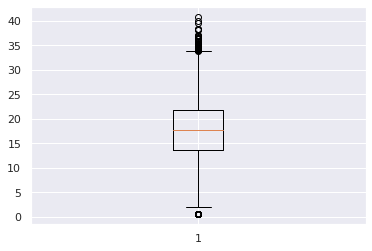

In [11]:
# Проверяем столбец duration на наличие аномалий
plt.boxplot(data_rides_row['duration'])

Видим, что сильных выбросов нет, все значения находятся возле *усов* графика 

### Проверяем наличие пропусков во всех наборах данных

In [12]:
# Осуществляем подсчет пропусков в данных users
data_users_row.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [13]:
# Осуществляем подстчет пропусков в данных rides
data_rides_row.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [14]:
# Осуществляем подстчет пропусков в данных subscription
data_subscription_row.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Как мы видим, пропусков в данных нет

### Проверяем наличие дубликатов в данных

Ищем дубликаты в данных

In [15]:
# Находим сумму дупликантов
print('Сумма колличества дупликантов в данных users:')
data_users_row.duplicated().sum()

Сумма колличества дупликантов в данных users:


31

In [16]:
# Находим сумму дупликантов
print('Сумма колличества дупликантов в данных rides:')
data_rides_row.duplicated().sum()

Сумма колличества дупликантов в данных rides:


0

In [17]:
# Находим сумму дупликантов
print('Сумма колличества дупликантов в данных subscription:')
data_subscription_row.duplicated().sum()

Сумма колличества дупликантов в данных subscription:


0

In [18]:
# Ищем дубликанты и удаляем их, индекс можно сразу обновить, поскольку дальнейшее объединение данных будет через id пользователя
data_users = data_users_row.drop_duplicates().reset_index()
data_rides = data_rides_row.reset_index()
data_subscription = data_subscription_row.reset_index()

Сделаем подстчет данных **до** и **после** предварительной обработки данных

In [19]:
# смотрим процентр оставшихся данных в наборе users
data_users['user_id'].count() / data_users_row['user_id'].count()

0.9801916932907349

In [20]:
# смотрим процент оставшихся данных в наборе rides
data_rides['user_id'].count() / data_rides_row['user_id'].count()

1.0

Таким образом, более ***98%*** данных в наборе **users** было сохранено после предварительной обработки, данные в наборе **rides** и **subscription** были сохранены в полном объеме. 

## Исследовательский анализ данных

Необходимо описать и визуализировать общую информацию о пользователях и поездках.

### Частота встречаемости городов

In [21]:
# Группируем колличество пользователей по городам
city = data_users.groupby('city')['user_id'].count().sort_values(ascending=False)

<AxesSubplot:title={'center':'Колличество пользователей по городам'}>

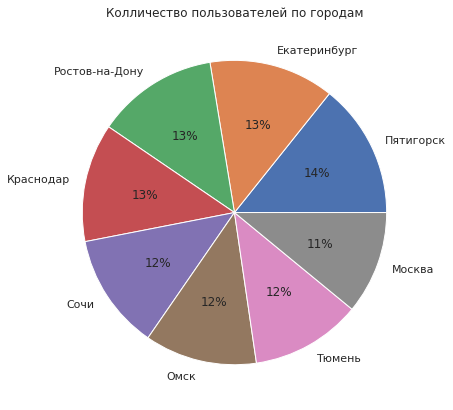

In [22]:
# Строим круговую диограмму данных
city.plot(kind='pie', ylabel='',title='Колличество пользователей по городам', autopct='%1.0f%%', figsize=(7, 7))

In [23]:
# Выводим числовые значения для наглядности
city = city.reset_index()
city.columns = ('cities', 'users')
city

,cities,users
0,Пятигорск,219
1,Екатеринбург,204
2,Ростов-на-Дону,198
3,Краснодар,193
4,Сочи,189
5,Омск,183
6,Тюмень,180
7,Москва,168


/tmp/ipykernel_1257/4058100152.py:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(city['cities'],


<BarContainer object of 8 artists>

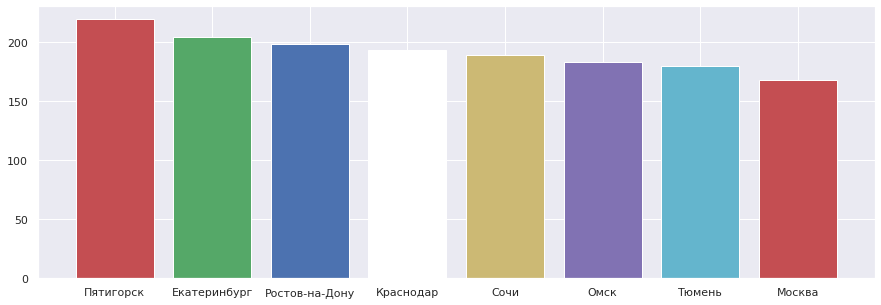

In [24]:
# Строим график
plt.figure(figsize=(15, 5))
plt.bar(city['cities'],
        city['users'],
        color='rgbwymc')

Из данных видно, что наиболее часто пользуются сервисом в г.Пятигосрк, на который приходится 14% всех пользователей, далее идут Екатеринбург, Ростов-на-Дону и Краснодар по 13%. Замыкает восьмерку всех городов - Москва, на которую приходится 11% пользователей. 

### Соотношение пользователей с подпиской и без

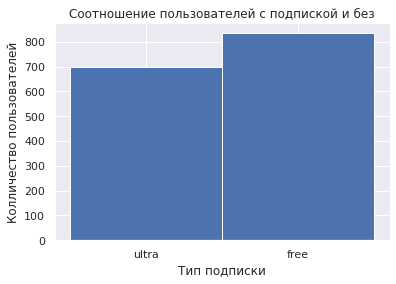

In [25]:
# Строим гистограмму распределения
plt.hist(data_users['subscription_type'],
         bins=2,
         range=(-0.5, 1.5),
         color='C0',
         histtype='bar',
         stacked=False)
plt.title('Соотношение пользователей с подпиской и без')
plt.xlabel('Тип подписки')
plt.ylabel('Колличество пользователей')
plt.show()

In [26]:
# Считаем процент пользователей без подписки
print('Процент пользователей без подписки:')
round(data_users[data_users['subscription_type']=='free']['subscription_type'].count() / data_users['subscription_type'].count() *100, 1)

Процент пользователей без подписки:


54.4

In [27]:
# Считаем процент пользователей с подпиской
print('Процент пользователей с подпиской:')
round(data_users[data_users['subscription_type']=='ultra']['subscription_type'].count() / data_users['subscription_type'].count() *100, 1)

Процент пользователей с подпиской:


45.6

Из полученных данным мы видим, что процент пользователей с подпиской **45.65** или около 700 пользователей сервиса. Пользователей же без подписки более 800 или порядка **54.4%** от всех пользователей. 

### Исследование возраста пользователей

In [28]:
# Определяем средний, медианный, минимальный и максимальный возраста
data_users['age'].apply(['mean', 'median', 'min', 'max'])

mean      24.90352
median    25.00000
min       12.00000
max       43.00000
Name: age, dtype: float64

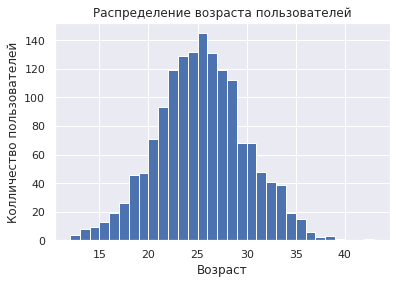

In [29]:
# Строим гистограмму распределения
plt.hist(data_users['age'],
         bins=31,
         range=(12, 43),
         color='C0',
         histtype='bar',
         stacked=False)
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Колличество пользователей')
plt.show()

In [30]:
# Находим наиболее часто встречающийся возраст пользователей
data_users['age'].mode()[0]

25

По имеющися данным видим, что *средний возраст* пользователей приложения равен 24.9 лет, *медианный* равен 25, он же является и наиболее часто встречающимся среди всех пользователей. При этом самому юному пользователю 12 лет, а самому возрастному 43. Распределение всех пользователей является нормальным, поэтому не вызываем вопросов к данным. 

### Исследование данных по пройденному расстоянию

Чтобы избежать некоторые выбросы в данных создадим сводную таблицу по пользователям и пройденной ими дистанции, найдем для каждого пользователя медианное и среднее(для наглядности) значения пройденного расстояния.

In [31]:
# Создаем сводную таблицу по пользователям и пройденной ими средней и медианной дистанциям
distance = data_rides.pivot_table(index='user_id',
                                  values='distance',
                                  aggfunc=['mean', 'median'])

In [32]:
# Выводим информацию по сводной таблицу
distance.describe()

,mean,median
,distance,distance
count,1534.000000,1534.000000
mean,3077.296650,3134.108236
std,327.624403,346.362860
min,1630.788427,1234.763317
25%,2882.505704,2916.315439
50%,3090.864050,3131.071202
75%,3293.325678,3337.730942
max,4287.519387,4395.430303


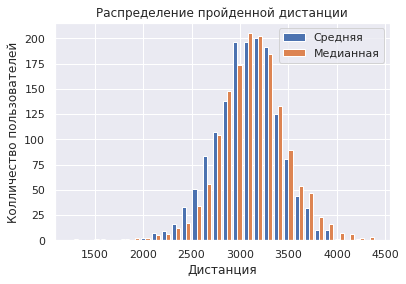

In [33]:
# Строим гистограмму распределения
plt.hist(distance,
         bins=30,
         stacked=False)
plt.title('Распределение пройденной дистанции')
plt.xlabel('Дистанция')
plt.ylabel('Колличество пользователей')
plt.legend(['Средняя', 'Медианная'])
plt.show()

По полученным данным становится известно, что в медианном значении каждый пользователь преодолевает 3134.11 км. Оба распределения и медианное, и среднее являются нормальными, сильных выбросов в данных не обнаружено.

### Исследование данных по продолжительности поездок

In [34]:
# Выводим информацию и поездках
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   index     18068 non-null  int64         
 1   user_id   18068 non-null  int64         
 2   distance  18068 non-null  float64       
 3   duration  18068 non-null  float64       
 4   date      18068 non-null  datetime64[ns]
 5   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 847.1 KB


In [35]:
# Делаем сводную таблицу по среднему и медианному значению продолжительности поездок
duration = data_rides.pivot_table(index='user_id',
                                  values='duration',
                                  aggfunc=['mean', 'median'])

In [36]:
# Выводим информацию по сводной таблице
duration.describe()

,mean,median
,duration,duration
count,1534.000000,1534.000000
mean,17.926440,17.727225
std,1.971150,2.322542
min,11.163431,10.711378
25%,16.613880,16.189955
50%,17.903937,17.743728
75%,19.198581,19.208337
max,26.136000,29.983174


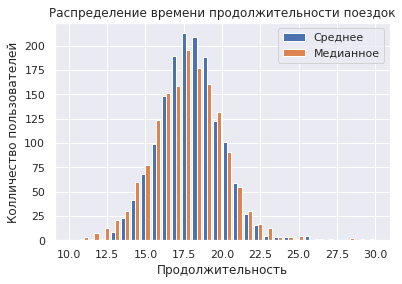

In [37]:
# Строим гистограмму распределения
plt.hist(duration,
         bins=30,
         range=(10, 30),
         stacked=False)
plt.title('Распределение времени продолжительности поездок')
plt.xlabel('Продолжительность')
plt.ylabel('Колличество пользователей')
plt.legend(['Среднее', 'Медианное'])
plt.show()

Выводим "Коробку с усами для данных по медианному значению продолжительности поездок:"


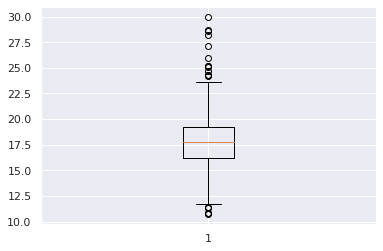

Выводим "Коробку с усами для данных по медианному значению длины поездок:"


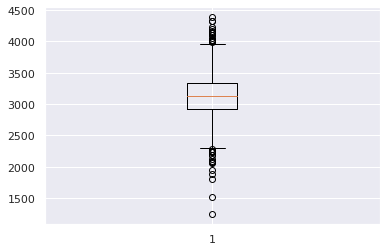

In [38]:
print('Выводим "Коробку с усами для данных по медианному значению продолжительности поездок:"')
plt.boxplot(duration['median'])
plt.show()
print('Выводим "Коробку с усами для данных по медианному значению длины поездок:"')
plt.boxplot(distance['median'])
plt.show()

Из данных по продолжительности поездок видно, что среднее и медианное значение почти равны, распределение является нормальным без особых выбросов и отклонений. Медианное время продолжительности поездок составляет чуть менее 18 минут. 

Видно некоторые выбросы не сильные быбросы в данных.

## Объединение данных

In [39]:
# Объединяем таблицы users, rides, subscription
data = pd.merge(data_users, data_rides, how='outer', on='user_id')
data = pd.merge(data, data_subscription, how='outer', on='subscription_type')
# Убираем лишние столбцы
data = data.drop(columns=['index_x', 'index_y'])
# Переименовываем столбец индекс
data = data.rename(columns={'index':'sub_index'})

In [40]:
# Проверяем таблицу на пропуски
data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
sub_index            0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [41]:
# Выводим получившуюся таблицу
data

,user_id,name,age,city,subscription_type,distance,duration,date,month,sub_index,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,1,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,1,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,1,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,0,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,0,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,0,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,0,8,50,0


Далее нам необходимо создать две отдельные таблицы для пользователей с подпиской ***ultra*** и без подписки

In [42]:
# Создаем таблицу пользователей с подпиской
data_ultra = data.query('subscription_type == "ultra"')
data_ultra

,user_id,name,age,city,subscription_type,distance,duration,date,month,sub_index,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,1,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,1,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,1,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,1,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,1,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,1,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,1,6,0,199


In [43]:
# Создаем таблицу пользователей без подписки
data_free = data.query('subscription_type == "free"')
data_free

,user_id,name,age,city,subscription_type,distance,duration,date,month,sub_index,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,0,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,0,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,0,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,0,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,0,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,0,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,0,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,0,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,0,8,50,0


Визуализируем информацию о среднем расстоянии и времени поездок для пользователей обоих категорий

In [44]:
# Делаем сводную таблицу для пользователей с подпиской
ultra_visual = data_ultra.pivot_table(index='user_id',
                                      values=['duration', 'distance'],
                                      aggfunc=['mean', 'median'])
ultra_visual.columns = ('Средняя дистанция', 'Среднее время в пути', 'Медианная дистанция', 'Медианное время в пути')
ultra_visual

,Средняя дистанция,Среднее время в пути,Медианная дистанция,Медианное время в пути
user_id,,,,
1,2839.181839,17.050409,2806.504429,16.233505
2,3087.641692,17.967662,3105.086678,18.779128
3,3075.633155,19.432793,2858.693148,19.835873
4,3202.656423,20.611684,3373.276987,20.723324
5,3232.449968,15.824903,3244.021903,14.904990
...,...,...,...,...
695,3144.646742,18.696910,3169.995523,16.886805
696,2962.621824,20.663592,2975.351390,17.751506
697,3044.089909,20.997917,3237.170107,19.289114


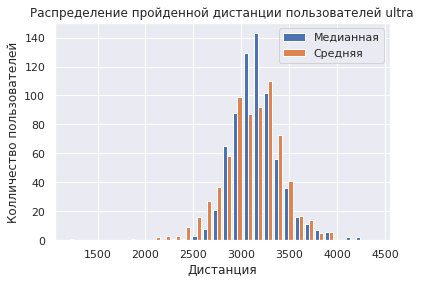

In [45]:
# Строим гистограмму распределения для пользователей с подпиской
plt.hist([ultra_visual['Медианная дистанция'], ultra_visual['Средняя дистанция']],
         bins=30,
         range=(1200, 4400),
         stacked=False)
plt.title('Распределение пройденной дистанции пользователей ultra')
plt.xlabel('Дистанция')
plt.ylabel('Колличество пользователей')
plt.legend(['Медианная', 'Средняя'])
plt.show()

In [46]:
# Выводим информацию
ultra_visual.describe()

,Средняя дистанция,Среднее время в пути,Медианная дистанция,Медианное время в пути
count,699.000000,699.000000,699.000000,699.000000
mean,3113.459926,18.574380,3154.648287,18.297611
std,299.706136,2.015094,264.679709,2.346264
min,2098.297845,11.385922,1234.763317,10.711378
25%,2925.005435,17.278630,3005.332045,16.740429
50%,3134.349186,18.585189,3142.127676,18.189880
75%,3312.191643,19.789236,3287.135120,19.702890
max,3939.773328,26.136000,4235.928023,29.983174


In [47]:
# Создаем сводную таблицу для пользователей free
free_visual = data_free.pivot_table(index='user_id',
                        values=['duration', 'distance'],
                        aggfunc=['mean', 'median'])
free_visual.columns = ('Средняя дистанция', 'Среднее время в пути', 'Медианная дистанция', 'Медианное время в пути')
free_visual

,Средняя дистанция,Среднее время в пути,Медианная дистанция,Медианное время в пути
user_id,,,,
700,2900.117210,15.179163,3015.965321,15.616269
701,3107.650943,14.488954,3436.950905,15.137141
702,3206.315062,17.848573,3387.284767,19.228790
703,2483.142929,15.464765,2547.626997,10.859179
704,3149.195578,16.658353,3261.700990,17.509964
...,...,...,...,...
1530,2750.498225,17.198049,2724.331740,16.207316
1531,2915.425836,17.747487,2999.913238,18.308701
1532,2607.861784,16.320011,2615.477834,14.846434


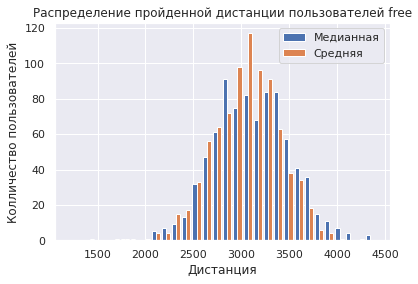

In [48]:
# Строим гистограмму распределения
plt.hist([free_visual['Медианная дистанция'], free_visual['Средняя дистанция']],
         bins=30,
         range=(1200, 4400),
         stacked=False)
plt.title('Распределение пройденной дистанции пользователей free')
plt.xlabel('Дистанция')
plt.ylabel('Колличество пользователей')
plt.legend(['Медианная', 'Средняя'])
plt.show()

In [49]:
# Выводим информацию
free_visual.describe()

,Средняя дистанция,Среднее время в пути,Медианная дистанция,Медианное время в пути
count,835.000000,835.000000,835.000000,835.000000
mean,3047.023441,17.384033,3116.913630,17.249741
std,346.570021,1.759845,401.539836,2.192495
min,1630.788427,11.163431,1517.240842,10.859179
25%,2820.516763,16.209124,2839.695681,15.717285
50%,3057.940909,17.402644,3112.562773,17.316444
75%,3276.990199,18.568622,3398.451369,18.742428
max,4287.519387,23.069943,4395.430303,25.135593


Для наглядности возьмем медианное значение обоих распределений:

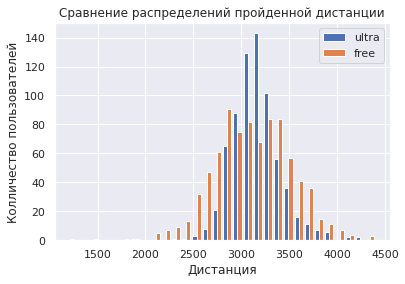

In [50]:
# Строим гистограмму распределения
plt.hist([ultra_visual['Медианная дистанция'], free_visual['Медианная дистанция']],
         bins=30,
         range=(1200, 4400),
         stacked=False)
plt.title('Сравнение распределений пройденной дистанции')
plt.xlabel('Дистанция')
plt.ylabel('Колличество пользователей')
plt.legend(['ultra', 'free'])
plt.show()

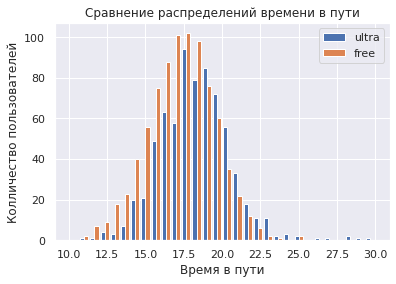

In [51]:
# Строим гистограмму распределения
plt.hist([ultra_visual['Медианное время в пути'], free_visual['Медианное время в пути']],
         bins=30,
         range=(10, 30),
         stacked=False)
plt.title('Сравнение распределений времени в пути')
plt.xlabel('Время в пути')
plt.ylabel('Колличество пользователей')
plt.legend(['ultra', 'free'])
plt.show()

По данным видно, что оба распределения являются нормальным распределением данных, заметно небольшое отклониние по времени пути, у пользователей с подпиской оно несколько выше, также, по гистограмме сравнения распределений пройденных дистанций можно заметить, что у пользователей с подпиской меньшая дисперсия в данных. 

## Подсчет выручки

Создаём датафрейм с агрегированными данными о поездках на основе объединённых данных:
- находим суммарное расстояние
- количество поездок 
- суммарное время для каждого пользователя за каждый месяц

In [52]:
# Делаем сводную таблицу с данными по суммарной дистанции и продолжительности поездки для каждого пользователя по месяцам
data_aggregate = data.pivot_table(index=['user_id', 'month'], 
                                  values = ['distance',
                                            'duration',
                                            'name', 
                                            'subscription_type'], 
                                  aggfunc={'distance':'sum',
                                           'duration':'sum', 
                                           'name':'count', 
                                           'subscription_type': 'min'})

data_aggregate.columns = ['total_distance', 'total_duration', 'trip_count', 'subscription_type']

In [53]:
# Выводим получившуюся сводную таблицу, округляем значения
data_aggregate['total_duration'] = np.ceil(data_aggregate['total_duration'])
data_aggregate['total_distance'] = round(data_aggregate['total_distance'], 2)
data_aggregate

total_distance  total_duration  trip_count subscription_type
user_id month                                                              
1       1             7027.51            42.0           2             ultra
        4              754.16             7.0           1             ultra
        8             6723.47            45.0           2             ultra
        10            5809.91            32.0           2             ultra
        11            7003.50            54.0           3             ultra
...                       ...             ...         ...               ...
1534    6             3409.47            25.0           2              free
        8             7622.45            48.0           2              free
        9             4928.17            23.0           1              free
        11           13350.02            77.0           4              free
        12            2371.71            16.0           1              free

[11331 rows x 4 columns]

In [54]:
# Делаем функцию подсчета ежемесячной прибыли в зависимости от наличия подписки
def revenue(row):
    if row['subscription_type'] == 'ultra':
        return np.ceil((row['total_duration'] * 6) + 199)
    elif row['subscription_type'] == 'free':
        return np.ceil((row['total_duration'] * 8) + (row['trip_count']*50))

# Применяем функцию
data_aggregate['revenue'] = data_aggregate.apply(revenue, axis=1)

# Убираем индексы и выводим получившуюся таблицу
data_aggregate = data_aggregate.reset_index()
data_aggregate

,user_id,month,total_distance,total_duration,trip_count,subscription_type,revenue
0,1,1,7027.51,42.0,2,ultra,451.0
1,1,4,754.16,7.0,1,ultra,241.0
2,1,8,6723.47,45.0,2,ultra,469.0
3,1,10,5809.91,32.0,2,ultra,391.0
4,1,11,7003.50,54.0,3,ultra,523.0
...,...,...,...,...,...,...,...
11326,1534,6,3409.47,25.0,2,free,300.0
11327,1534,8,7622.45,48.0,2,free,484.0
11328,1534,9,4928.17,23.0,1,free,234.0
11329,1534,11,13350.02,77.0,4,free,816.0


## Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов:

- Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.
- Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.
- Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.
- Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Для проверки гипотез мы будет использовать параметр допуска(**alpha**) равный 0.05

### Гипотеза: 1

Выдвигаем **нулевую гипотезу**: Пользователи с подпиской тратят столько же времени на поездки как и пользователи без подписки.

Тогда **альтернативная гипотеза**: Пользователи с подпиской больше меньше времени на поездки чем пользователи без подписки. 

In [61]:
# Для проверки нулевой гипотезы сравним данные по ежемесячному времени использования сервиса
results = st.ttest_ind(data_aggregate.query('subscription_type == "ultra"')['total_duration'], 
                       data_aggregate.query('subscription_type == "free"')['total_duration'],
                       equal_var=False,
                       alternative='greater') 

# Вычисляем p-value
print('p-значение:', results.pvalue)

# Делаем сравнение p-value с параметром допуска и выводим результат сравнения
alpha = 0.05
if results.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 1.0
Не отвергаем нулевую гипотезу


После проведеного t-тестирования мы не можем отвергать нулевую гипотезу. 

### Гипотеза: 2


Выдвигаем **нулевую гипотезу**: Расстояние, которое пользователи с подпиской проезжают за одну поездку равно 3130 метров

Тогда **альтернативная гипотеза**: Расстояние, которое пользователи с подпиской проезжают за одну поездку больше 3130 метров

In [56]:
# Интересующее значение
interested_value = 3130
# Проверка гипотезы
results = st.ttest_1samp(data.query('subscription_type =="ultra"')['distance'],
                         interested_value,
                         alternative='greater')

# Вычисляем p-value
print('p-значение:', results.pvalue)

# Делаем сравнение p-value с параметром допуска и выводим результат сравнения
alpha = 0.05
if results.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 0.9195368847849785
Не отвергаем нулевую гипотезу


Таким образом, гипотезу, что расстояние, которое пользователи с подпиской проезжают за одну поездку 3130 метров - отвергать нельзя. 

### Гипотеза: 3

Выдвигаем **нулевую гипотезу**: Ежемесячная прибыль от пользователей с подпиской выше, чем от пользователей без подписки.

Тогда **альтернативная гипотеза**: Ежемесячная прибыль от пользователей с подпиской ***не*** выше, чем от пользователей без подписки.

In [57]:
# Проверка гипотезы
results = st.ttest_ind(data_aggregate.query('subscription_type == "ultra"')['revenue'], 
                       data_aggregate.query('subscription_type == "free"')['revenue'],
                       equal_var=False,
                       alternative='greater') 

# Вычисляем p-value
print('p-значение:', results.pvalue)

# Делаем сравнение p-value с параметром допуска и выводим результат сравнения
alpha = 0.05
if results.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 1.0718729651261336e-44
Отвергаем нулевую гипотезу


Таким образом, гипотеза, что пользователи с подпиской приносят больше ежемесячной прибыли не подтверждена. 

## Общий вывод

Для работы были даны данные сервиса проката самокатов, из которым выяснили, что колличество пользователей равно **1534**, который совершили **11331** поездку. 

Была проведена работа по предварительной обработке данных: поиску наличия пропусков и их устранению, проверка наличия дубликатов. 

Проведён анализ данных:
- Частота встречаимости городов
из которого выявили, что больше всего пользуются сервисом в г. Пятигорск **14%**, далее г.Екатеринбург, г.Ростов-на-Дону, г.Краснодар - по **13%**, меньше всего из 8 город пользуются в г.Москва - **11 %** от общего числа пользователей. 

- Соотношение пользователей с подпиской и без
по данным было видно, что пользователей с подпиской около **700**, что соответствует **45.65%** от общего числа пользователей. Соответственно пользователей без подписки **54.4%** от общего числа, или более **800** пользователей. 

- Исследование позраста пользователей
средний возраст пользователей приложения **25 лет**, это и самый часто встречающийся в данных возраст пользователей. При этом самому юному полбзователю **12 лет**, а самому возрастному - **43 года**. 

- Исследование данных по пройденному расстоянию
по медианному значению, каждый пользователь в среднем преодолевает **3134.11 км**., минимальное среднее же расстояние будет **1234.76 км**., максимальное среднее **4395.43 км**. 

- Исследование данных по продолжительности поездок
среднее и медианное значение почти равны, медианное время продолжительности поездок составляет чуть менее **18 минут**.


Были сравнены распределения продолжительности поездок и пройденному пути для пользователей с подпиской и без. У пользователей с подпиской время в пути несколько выше, также, по гистограмме сравнения распределений пройденных дистанций можно заметить, что у пользователей с подпиской меньшая дисперсия в данных.

Также, был осуществлён подсчёт ежемесячных затрат пользователей на пользование сервисом. 

Были проверены гипотезы:
1) Пользователи с подпиской тратят больше времени на поездки
данную гипотезу **отвергать нельзя**.  

2) Расстояние, которое пользователи с подпиской преодолевают за одну поездку не превышает 3130 м. 
после проведения t-теста стало понятно, что **отвергать данную гипотезу нельзя** 

3) Ежемесячная прибыль от пользователей с подпиской выше, чем от пользователей без подписки 
по результатам t-тастирования данная гипотеза **не подтверждена** 

Таким образом, все поставленые задачи были выполнены, гипотезы проверены. 

Рекомендация по развитию сервиса:

- Масштабирование, с увеличением колличества самокатов, и других городов будет больше прибыль

- Проводить рекламную компанию для целевой аудитории, которая была найдена в исследовании

- Увеличить цену подписки, поскольку пользователи с подпиской приносят меньше прибыли 